# Importing libraries

In [31]:
import csv
import os
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

csv.field_size_limit(1000000000)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fazal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fazal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fazal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fazal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1000000000

# Reading the file and performing basic cleanup

In [32]:
import string

# read csv file from data folder
df = pd.read_csv(os.path.join('data', 'state-of-the-union.csv'), names=['year', 'speech'], skiprows=1)

def perform_initial_cleanup(data_frame):
    data_frame['speech'] = data_frame['speech'].str.replace('\nState of the Union Address\n', '')
    data_frame['speech'] = data_frame['speech'].str.replace('\nAddress to Joint Session of Congress \n', '')
    data_frame['speech'] = data_frame['speech'].str.replace('\nAddress on Administration Goals (Budget Message)\n', '')
    data_frame['speech'] = data_frame['speech'].str.replace('\nAddress on Administration Goals\n', '')
    data_frame['speech'] = data_frame['speech'].str.replace('\nAddress to Congress \n', '')
    data_frame['president'] = data_frame['speech']
    data_frame['president'] = data_frame['president'].str.split('\n').str[0]
    data_frame['date'] = data_frame['speech'].str.split('\n').str[1]
    temp_date = data_frame[data_frame['date'] == 'Address on Administration Goals (Budget Message)']['speech'].str.split('\n').str[3]
    data_frame['date'][data_frame['date'] == 'Address on Administration Goals (Budget Message)'] = temp_date.values[0]
    # delete first 3 lines of speech
    data_frame['speech'] = data_frame['speech'].str.split('\n').str[3:]
    # make a string list
    data_frame['speech'] = data_frame['speech'].str.join(' ')
    # replace \ with ''
    data_frame['speech'] = data_frame['speech'].str.replace('\\\'', '')
    # decapitalize
    data_frame['speech'] = data_frame['speech'].str.lower()
    # remove punctuation
    data_frame['speech'] = data_frame['speech'].str.replace('[{}]'.format(string.punctuation), '')
    # remove word 'America' 'america' 'americas' 'Americas' 'american' 'American' 'Americans' 'American' 'americans'
    data_frame['speech'] = data_frame['speech'].str.replace('America', '')
    data_frame['speech'] = data_frame['speech'].str.replace('Americas', '')
    data_frame['speech'] = data_frame['speech'].str.replace('American', '')
    data_frame['speech'] = data_frame['speech'].str.replace('Americans', '')
    data_frame['speech'] = data_frame['speech'].str.replace('america', '')
    data_frame['speech'] = data_frame['speech'].str.replace('americas', '')
    data_frame['speech'] = data_frame['speech'].str.replace('american', '')
    data_frame['speech'] = data_frame['speech'].str.replace('americans', '')

    return data_frame


df = perform_initial_cleanup(df)

C:\Users\fazal\AppData\Local\Temp\ipykernel_5008\2210526369.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['speech'] = data_frame['speech'].str.replace('\nAddress on Administration Goals (Budget Message)\n', '')
C:\Users\fazal\AppData\Local\Temp\ipykernel_5008\2210526369.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['date'][data_frame['date'] == 'Address on Administration Goals (Budget Message)'] = temp_date.values[0]
C:\Users\fazal\AppData\Local\Temp\ipykernel_5008\2210526369.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['speech'] = data_frame['speech'].str.replace('\\\'', '')
C:\Users\fazal\AppData\Local\Temp\ipykernel_5008\2210526369.py:26: FutureWar

# Performing Lemmatization & Cleanup

In [33]:
import re
from nltk import pos_tag

# perform initial lemmatization
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in word_tokenize(text)]


df['speech'] = df['speech'].apply(lemmatize_text)
df['speech'] = df['speech'].apply(lambda x: [item for item in x if item not in stop_words])
df['speech'] = df['speech'].apply(lambda x: ' '.join(x))

NUM_TOPICS = 5
STOPWORDS = stopwords.words('english')

wnl = WordNetLemmatizer()


def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'


def lemmatize_sent(text):
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in pos_tag(word_tokenize(text))]


def clean_lemma_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return lemmatize_sent(' '.join(cleaned_text))


# clean the speeches
tokenized_speeches = df['speech'].apply(clean_lemma_text)
tokenized_speeches

0      [fellowcitizens, senate, house, representative...
1      [fellowcitizens, senate, house, representative...
2      [fellowcitizens, senate, house, representative...
3      [fellowcitizens, senate, house, representative...
4      [fellowcitizens, senate, house, representative...
                             ...                        
220    [madam, speaker, vice, president, cheney, memb...
221    [madame, speaker, vice, president, member, con...
222    [madame, speaker, vice, president, biden, memb...
223    [speaker, vice, president, member, congress, d...
224    [speaker, vice, president, member, congress, d...
Name: speech, Length: 225, dtype: object

# Making LDA & LSI model using Gensim

In [35]:
from nltk import sent_tokenize
from gensim import models, corpora

df['tokens'] = tokenized_speeches

# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(df.tokens)
# dictionary.filter_extremes(no_below=3, no_above=.03)

# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in df.tokens]

def sotu_topic_finder(year):
    """
    Find SOTU topics using LDA. The LDA model is only trained on the text of that year topic
    Input: index i of the speech
    Output: list 5 topics found by the model
    """
    # Clean the text
    sent_text = sent_tokenize(df.speech[year - 1790])
    token_list = []
    for sent in sent_text:
        cleaned_sent = clean_lemma_text(sent)
        token_list.append(cleaned_sent)

    # Prepare the dictionary and corpus
    dictionary = corpora.Dictionary(token_list)
    corpus = [dictionary.doc2bow(text) for text in token_list]

    # Build the LDA model
    lda_model = models.LdaModel(corpus=corpus,
                                num_topics=10,
                                id2word=dictionary)

    # Output model
    print("LDA Model of %i:" % year)
    for idx in range(5):
        # Print the first 10 most representative topics
        print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))

    # build the LSI model
    lsi_model = models.LsiModel(corpus=corpus,
                                num_topics=10,
                                id2word=dictionary)

    print()
    print("LSI Model of %i:" % year)
    for idx in range(5):
        # Print the first 10 most representative topics
        print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))

    return lda_model, lsi_model


yearly_models = []
for year in range(1990, 2005):
    yearly_models.append(sotu_topic_finder(year))

yearly_models

LDA Model of 1990:
Topic #0: 0.019*"must" + 0.007*"let" + 0.007*"make" + 0.007*"new" + 0.006*"ask" + 0.006*"future" + 0.005*"tonight" + 0.005*"year" + 0.005*"budget" + 0.005*"time"
Topic #1: 0.015*"must" + 0.008*"budget" + 0.008*"ask" + 0.007*"new" + 0.007*"tonight" + 0.006*"year" + 0.006*"let" + 0.006*"make" + 0.006*"time" + 0.005*"future"
Topic #2: 0.011*"must" + 0.008*"new" + 0.006*"ask" + 0.006*"make" + 0.005*"tonight" + 0.005*"budget" + 0.005*"time" + 0.005*"need" + 0.005*"year" + 0.005*"congress"
Topic #3: 0.009*"must" + 0.005*"new" + 0.004*"ask" + 0.004*"tonight" + 0.004*"year" + 0.004*"time" + 0.003*"drug" + 0.003*"let" + 0.003*"nation" + 0.003*"future"
Topic #4: 0.015*"must" + 0.007*"ask" + 0.006*"budget" + 0.006*"let" + 0.006*"new" + 0.005*"make" + 0.005*"year" + 0.005*"time" + 0.005*"tonight" + 0.005*"work"

LSI Model of 1990:
Topic #0: 0.411*"must" + 0.185*"new" + 0.176*"tonight" + 0.168*"make" + 0.168*"ask" + 0.159*"budget" + 0.151*"let" + 0.151*"year" + 0.134*"time" + 0.1

[(<gensim.models.ldamodel.LdaModel at 0x2308f1e2d70>,
  <gensim.models.lsimodel.LsiModel at 0x230b2698820>),
 (<gensim.models.ldamodel.LdaModel at 0x230b269a500>,
  <gensim.models.lsimodel.LsiModel at 0x230b269b340>),
 (<gensim.models.ldamodel.LdaModel at 0x230b269a1a0>,
  <gensim.models.lsimodel.LsiModel at 0x230b269a170>),
 (<gensim.models.ldamodel.LdaModel at 0x230b2699b10>,
  <gensim.models.lsimodel.LsiModel at 0x230b269a020>),
 (<gensim.models.ldamodel.LdaModel at 0x230b2698d90>,
  <gensim.models.lsimodel.LsiModel at 0x230b2699db0>),
 (<gensim.models.ldamodel.LdaModel at 0x230b2698fd0>,
  <gensim.models.lsimodel.LsiModel at 0x230b2699000>),
 (<gensim.models.ldamodel.LdaModel at 0x230b269bc40>,
  <gensim.models.lsimodel.LsiModel at 0x230b269bc10>),
 (<gensim.models.ldamodel.LdaModel at 0x230b2698430>,
  <gensim.models.lsimodel.LsiModel at 0x230b269ae30>),
 (<gensim.models.ldamodel.LdaModel at 0x230b2698790>,
  <gensim.models.lsimodel.LsiModel at 0x230b269a2f0>),
 (<gensim.models.ld

# visualize topics

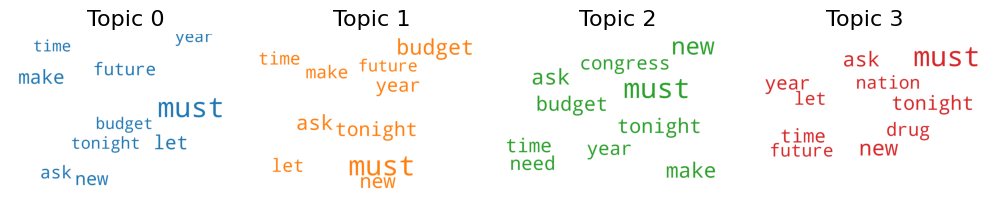

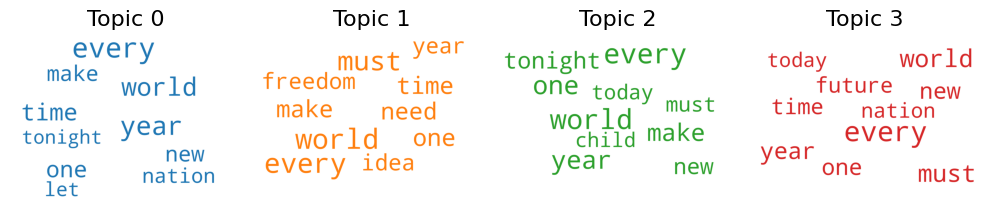

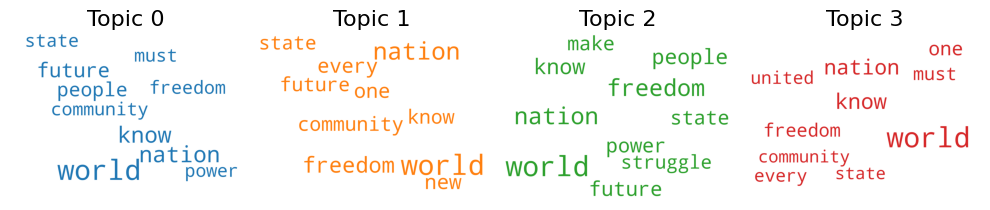

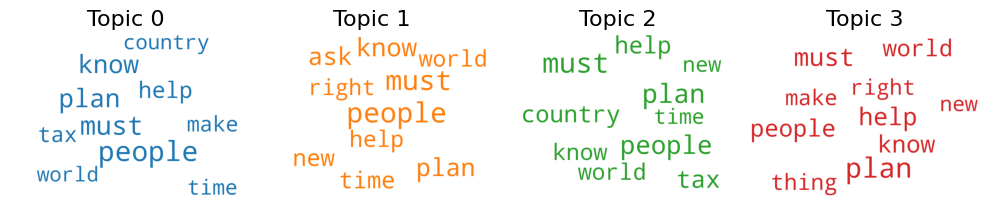

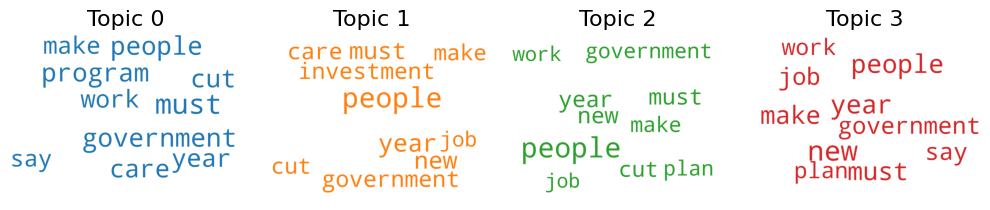

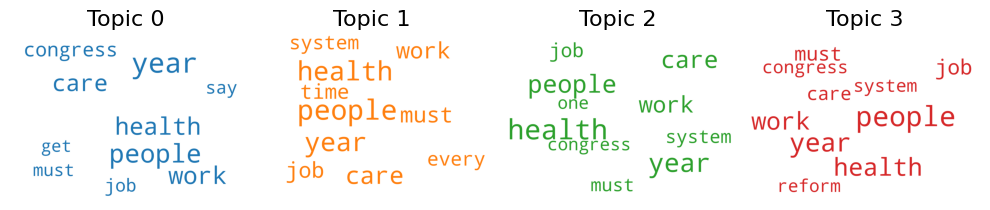

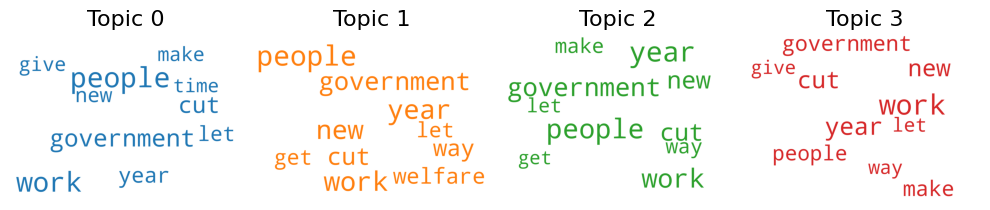

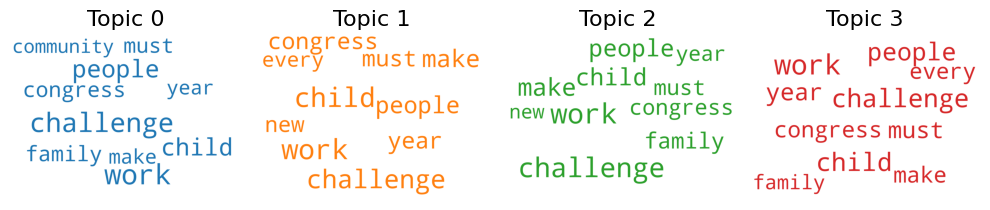

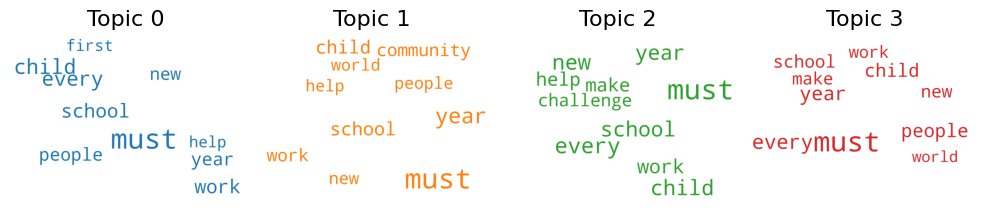

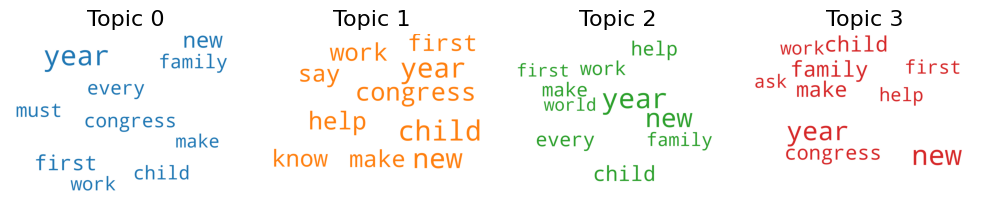

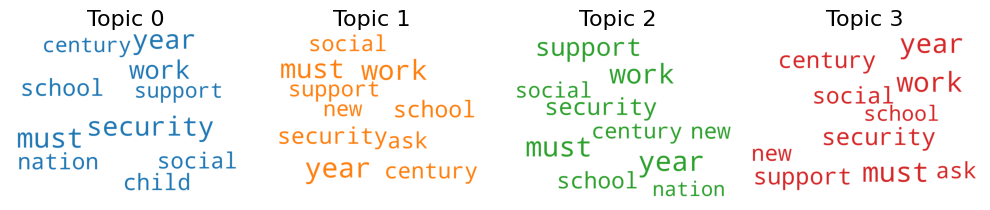

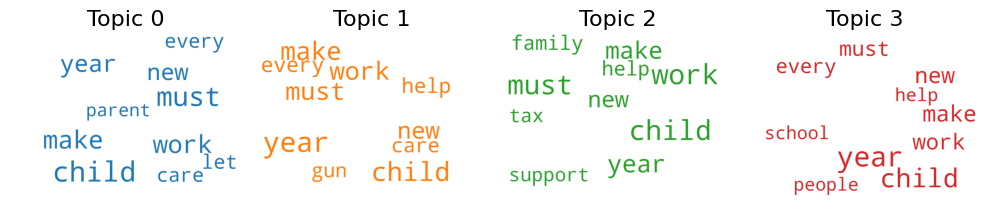

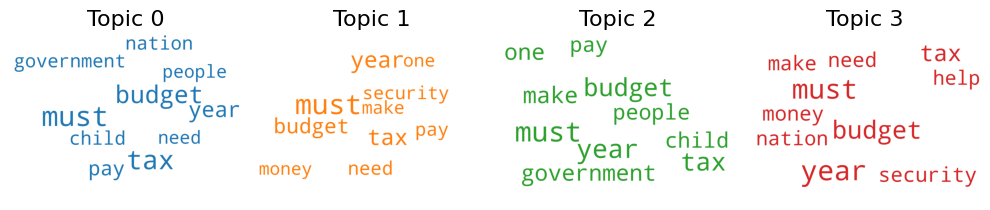

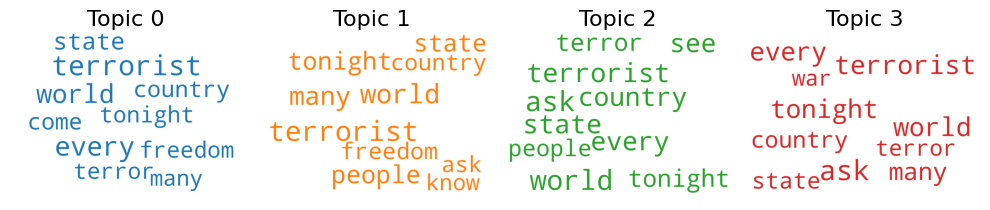

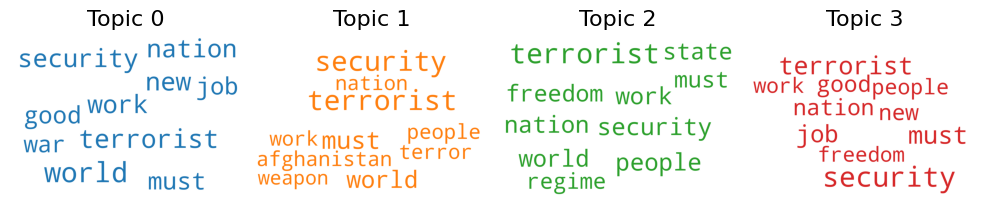

In [41]:
topics_1990 = yearly_models[0][0]


# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


def visualize_topics(yearly_model):
    global cols, i
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)
    topics = yearly_model.show_topics(formatted=False)
    fig, axes = plt.subplots(1, 4, figsize=(10, 10), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()


for ldaM in yearly_models:
    visualize_topics(ldaM[0])
